# Value at Risk Assessment Model

### Import Packages

In [8]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

### Distributions - Set Up Stock Parameters

In [9]:
# Number of shares
shares_MSFT = 1000

# Live stock price
price = yf.Ticker('MSFT')
price_MSFT = price.history().tail(1)['Close'].iloc[0]

print(price)
print('---------')
print(price_MSFT)

yfinance.Ticker object <MSFT>
---------
390.489990234375


30-day Historical volatility source: https://www.alphaquery.com/stock/MSFT/volatility-option-statistics/30-day/historical-volatility

In [11]:
# Investment value
value_MSFT = price_MSFT * shares_MSFT

# Risk free rate (4-week treasury bill rate)
rfr_MSFT = 0.02

# Volatility (30-day volatility at that time)
vol_MSFT = 0.2116

### Simulations - Calculate Investment Returns

In [12]:
# Number of simulations
simulations = 5000

# Investment time in a year
t_MSFT = 21/252

(array([  2.,   0.,   3.,   1.,   1.,   0.,   2.,   1.,   4.,   4.,   4.,
          1.,   1.,   5.,   6.,   5.,   9.,  12.,  15.,  14.,  22.,  18.,
         23.,  28.,  33.,  32.,  38.,  41.,  50.,  49.,  58.,  86.,  62.,
         69.,  87.,  89., 103.,  91., 108.,  98., 125., 126., 140., 157.,
        154., 144., 137., 140., 154., 132., 147., 132., 138., 124., 131.,
        111., 112., 125.,  93., 128.,  92.,  96.,  90.,  79.,  86.,  70.,
         70.,  64.,  37.,  61.,  44.,  46.,  36.,  35.,  25.,  18.,  17.,
         18.,  14.,  12.,   8.,  11.,   9.,   7.,   3.,   7.,   3.,   5.,
          4.,   3.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          1.]),
 array([-3.52949919e+00, -3.45748111e+00, -3.38546303e+00, -3.31344495e+00,
        -3.24142687e+00, -3.16940879e+00, -3.09739071e+00, -3.02537263e+00,
        -2.95335455e+00, -2.88133647e+00, -2.80931840e+00, -2.73730032e+00,
        -2.66528224e+00, -2.59326416e+00, -2.52124608e+00, -2.44922800e+00,
        -2.377

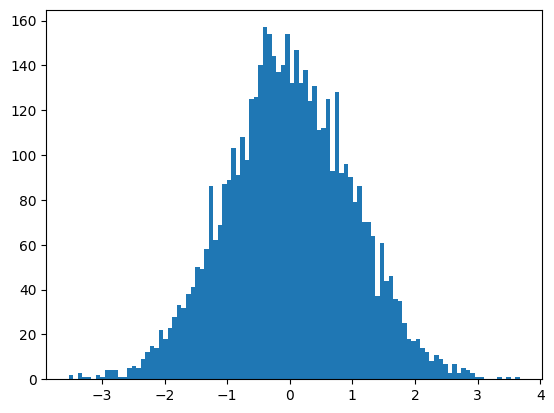

In [13]:
# Explain np.random.standard_normal
sample = np.random.standard_normal(5000)
plt.hist(sample,bins=100)

In [14]:
print(np.mean(sample))
print(np.std(sample))

-0.005833682064632542
1.0027840163115247


In [18]:
# Create a function to calculate the returns of the investment
def VaR(pv, rfr, vol, t, simulations):
    end_value = pv * np.exp((rfr - .5 * vol ** 2) * t + np.random.standard_normal(
        simulations) * vol * np.sqrt(t))
    returns = end_value - pv
    return returns

# Apply the VaR function to simulate the returns
returns_MSFT = VaR(value_MSFT, rfr_MSFT, vol_MSFT, t_MSFT, simulations)

### Quantifications - Identify VaR at 90%, 95%, and 99% Confidence Level

In [19]:
# Explain string formatting
# Print: VaR at x% confidence level: $y.

x = 0.9
y = 3455.248
print("VaR at {:.0%} confidence level: ${:,.0f}".format(x,y))

VaR at 90% confidence level: $3,455


VaR at 90% confidence level: $-29,212
VaR at 95% confidence level: $-37,236
VaR at 99% confidence level: $-52,188


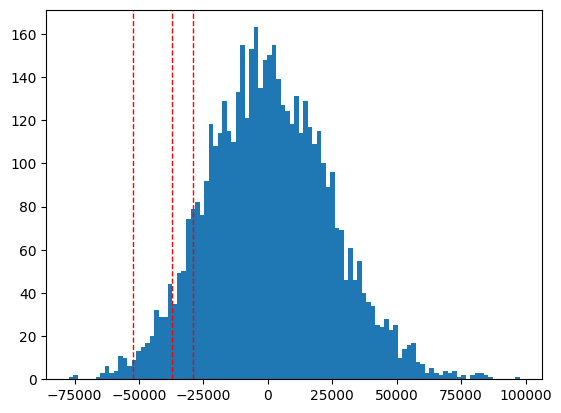

In [21]:
# Plot the returns
plt.hist(returns_MSFT, bins=100);

# Show VaR at 90%, 95%, and 99% confidence level
percentiles = [10,5,1]

for i in percentiles:
    confidence = (100-i)/100
    value = np.percentile(returns_MSFT, i)
    print("VaR at {:.0%} confidence level: ${:,.0f}".format(confidence, value))
    plt.axvline(value, color = 'red', linestyle='dashed', linewidth=1)